In [50]:
import numpy as np
import random
import sympy as sy
import matplotlib.pyplot as plt
%matplotlib inline
from datascience import *
from scipy.stats import norm

In [17]:
class BattleshipGame:
    def __init__(self):
        self.board = np.repeat(0, 100)
        self.carrier = 5
        self.battleship = 4
        self.cruiser = 3
        self.submarine = 3
        self.patrol_boat = 2
        self.ships = [self.carrier, self.battleship, self.cruiser, self.submarine, self.patrol_boat]

    def horizontal(self, ship_choice):
        while True:
            choice_y = random.choice(np.arange(0, 10))
            choice_x = random.choice(np.arange(1, 12 - ship_choice))
            choice = choice_x + choice_y * 10
            if all(0 <= choice + i < len(self.board) and self.board[choice + i] == 0 for i in range(ship_choice)):
                for i in range(ship_choice):
                    self.board[choice + i] = 1
                return self.board, choice

    def vertical(self, ship_choice):
        while True:
            choice_y = random.choice(np.arange(0, 11 - ship_choice))
            choice_x = random.choice(np.arange(0, 10))
            choice = choice_x + choice_y * 10
            if all(0 <= choice + i < len(self.board) and self.board[choice + (i*10)] == 0 for i in range(ship_choice)):
                for i in range(ship_choice):
                    self.board[choice + (i-1)*10] = 1
                return self.board, choice

    def build_board(self):
        ship_order = random.sample(self.ships, 5)
        vert_hor_order = [random.choice([0, 1]) for i in range(5)]
        for i in range(5):
            if vert_hor_order[i] == 0:
                self.horizontal(ship_order[i])
            else:
                self.vertical(ship_order[i])
        return self.board

    def game_logic(self, pick):
        if self.board[pick] == 1:
            self.board[pick] = 2

In [18]:
#Project ease of use tools
def easyview():
    viewer = sy.Matrix([BattleshipGame().board.take(np.arange(i, i + int(np.sqrt(len(BattleshipGame().board))))).tolist() for i in range(0, int(len(BattleshipGame().board)), int(np.sqrt(len(BattleshipGame().board))))])
    return viewer

In [19]:
#Ships Fairness Testing
shipsTestingHorizontal = [[],[],[],[],[]]
for i in range(5):
    board = np.repeat(0,100)
    shiptest = BattleshipGame().ships[i]
    for j in range(10000):
        board = np.repeat(0,100)
        pick = BattleshipGame().horizontal(shiptest)[1]
        shipsTestingHorizontal[i] = np.append(shipsTestingHorizontal[i], pick)

shipsTestingVertical = [[],[],[],[],[]]
for i in range(5):
    board = np.repeat(0,100)
    shiptest = BattleshipGame().ships[i]
    for j in range(10000):
        board = np.repeat(0,100)
        pick = BattleshipGame().vertical(shiptest)[1]
        shipsTestingVertical[i] = np.append(shipsTestingVertical[i], pick)

In [29]:
#Distribution Tester
distribution = np.repeat(0,100)
board = np.repeat(0,100)
for i in range(10000):
    BattleshipGame().build_board()
    for i in range(100):
        if BattleshipGame().build_board()[i] == 1:
            distribution[i] += 1
    board = np.repeat(0,100)

In [42]:
CallIndex = Table().with_columns(
    'Index', np.arange(100), 
    'Num Times Called', distribution)

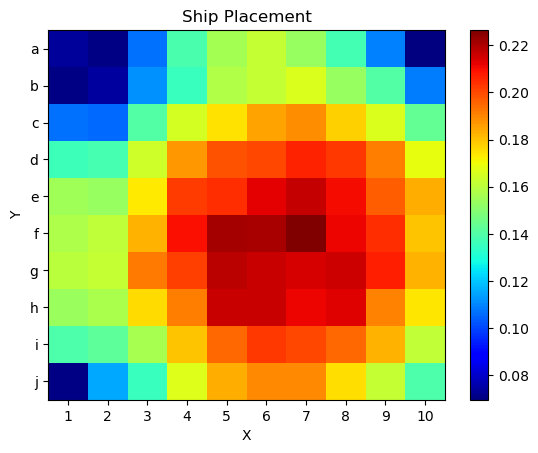

In [31]:
#Heatmap of placements
X, Y = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 10, 1))
distribution_New = distribution / 10000
distribution_2D = distribution_New.reshape(X.shape)
plt.pcolormesh(X, Y, distribution_2D, cmap=plt.cm.jet)
plt.xticks(np.arange(0, 10), np.arange(1, 11))
plt.yticks(np.arange(0, 10), [chr(ord('a') + i) for i in range(9, -1, -1)])  
plt.colorbar()
plt.title('Ship Placement')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

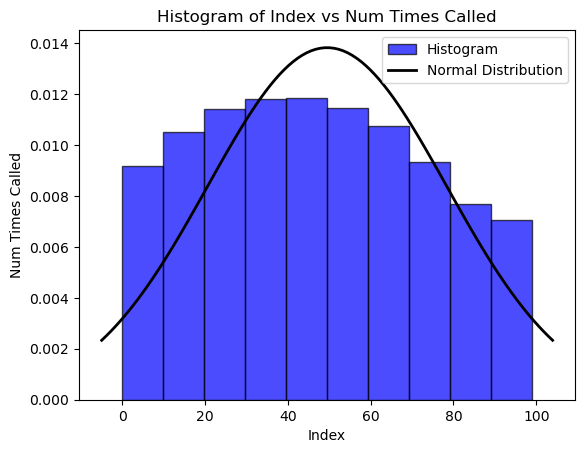

In [71]:
plt.hist(CallIndex.column('Index'), weights=CallIndex.column('Num Times Called'), bins=10, density=True, alpha=0.7, color='blue', label='Histogram')
plt.xlabel('Index')
plt.ylabel('Num Times Called')
plt.title('Histogram of Index vs Num Times Called')

mu, sigma = np.mean(CallIndex.column('Index')), np.std(CallIndex.column('Index'))
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.legend()

plt.show()